### Module 5. Lab 5-02 two-sample t-test

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 1

Assume that a soft-drink company is considering a style change to its current can, which has been the company’s trademark for many years. To determine whether this new style is popular with consumers, the company runs a number of focus group sessions around the country. At each of these sessions, randomly selected consumers are allowed to examine the new and traditional styles, exchange ideas, and offer their opinions. 
Eventually, they fill out a form where, among other questions, they are asked to respond to 
the following items, each on a scale of 1 to 7, 7 being the best:
- Rate the attractiveness of the traditional-style can (AO).
- Rate the attractiveness of the new-style can (AN).
- Rate the likelihood that you would buy the product with the traditional-style can (WBO).
- Rate the likelihood that you would buy the product with the new-style can (WBN).

(A and WB stand for "attractiveness" and "would buy", and O and N stand for "old" and "new".)

Use a test to see whether 
consumers rate the attractiveness, and their likelihood to purchase, higher for a new-style can than for the traditional-style can. First make a boxplot.

A few results
- AO vs AN: pvalue=1.32316e-07 < 0.05 => the attractiveness of the new-style can is significantly higher than the attractiveness of the traditional-style can

- WBO vs WBN: pvalue=2.00845995e-06 < 0.05 => the likelihood to buy the new-style can is significantly higher than the likelihood to buy the traditional-style can


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Soft-Drink%20Cans.csv', delimiter=';',index_col=0)
df.head()

,AO,AN,WBO,WBN
Consumer,,,,
1,5,7,4,1
2,7,7,6,6
3,6,7,7,6
4,1,3,1,1
5,3,4,1,1


<Axes: >

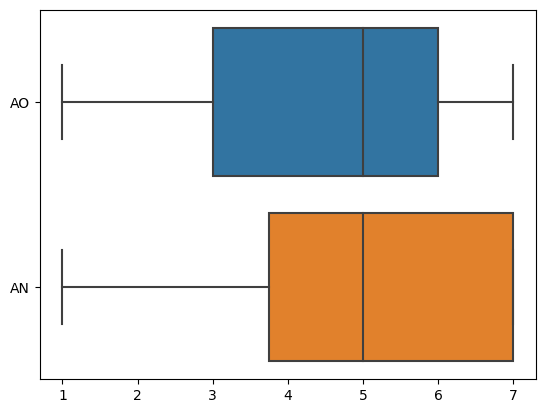

In [13]:
sns.boxplot(data=df[['AO','AN']],orient='h') #neemt AO en AN uit tabel en maakt hier boxplot van


<Axes: >

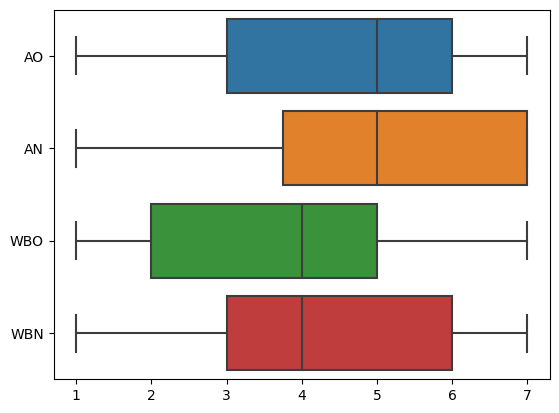

In [12]:
sns.boxplot(data=df,orient='h') #neemt toont alles doordat consumer kolom index is wordt deze niet getoond.

In [14]:
# Dit is een gepaarde toets
stats.ttest_rel(df["AO"], df["AN"], alternative='less')
#P < 0.05, dus groot verschil,nullhypothese verwerpen, 
# De attrictiveness voor nieuwe te kopen is significant groter dan oude.

TtestResult(statistic=-5.351419141432879, pvalue=1.3231562068750385e-07, df=179)

In [18]:
# Dit is een gepaarde toets
# H1: WBO - WBN < 0 (Meer mensen nieuwe kopen dan oude)
stats.ttest_rel(df["WBO"], df["WBN"], alternative='less')
#P < 0.05, dus een significant verschil, dus nullhypothese verwerpen, Meer mensen zouden nieuwe kopen tov oude.

TtestResult(statistic=-4.757802744662339, pvalue=2.0084599545902635e-06, df=179)

## Exercise 2

Many companies have installed exercise facilities at their plants. The goal is not only to provide a bonus (free use of exercise equipment) for their employees, but to make the employees more productive by getting them in better shape. One such (fictional) company, Informatrix Software Company, installed exercise equipment on site a year ago.   
To check whether it has had a beneficial effect on employee productivity, the company gathered data on a sample of 80 randomly chosen employees, all between the ages of 30 and 40 and all with similar job titles and duties. The company observed which of these employees use the exercise facility regularly (at least three times per week on average). This group included 23 of the 80 employees in the sample. The other 57 employees were asked whether they exercise regularly elsewhere, and 6 of them replied that they do. The remaining 51, who admitted 
to being nonexercisers, were then compared to the combined group of 29 exercisers.  
The comparison was based on the employees' productivity over the year, as rated by their supervisors. Each rating was on a scale of 1 to 25, 25 being the best. To increase the validity of the study, neither the employees nor the supervisors were told that a study was in progress. In particular, the supervisors did not know which employees were involved 
in the study or which were exercisers.

1. Make Box Plot of Ratings by Exerciser
2. Use a test to see whether 
regular exercise increases worker productivity.
3. Calculate Cohen's d to know the effect size

A few results

2. pvalue=0.006299793 < 0.05 => the productivity of Exercisers is significantly higher than of no Exercisers
3. Cohen's d is 0.55509: average effect size

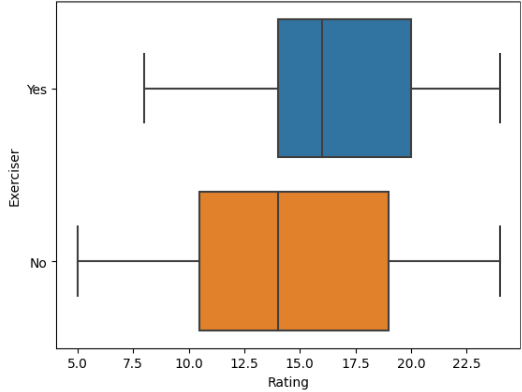


In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Exercise%20%26%20Productivity.csv', delimiter=';')
df.head()

,Employee,Exerciser,Rating
0,1,Yes,14
1,2,No,7
2,3,No,15
3,4,Yes,15
4,5,No,13


<Axes: xlabel='Exerciser', ylabel='Rating'>

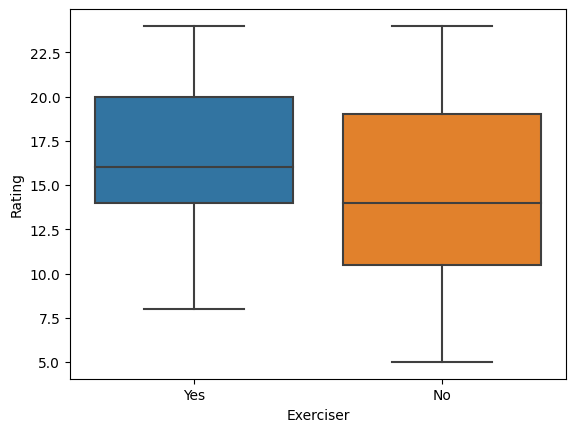

In [20]:
sns.boxplot(data=df,x="Exerciser",y="Rating")

In [26]:
# Dit is een gepaarde toets
# H0: nonExercisers - Exercisers = 0
# H1: NonExercisers - Exercisers < 0 (Rating exercisers is significant hoer dan NonExercisers)
nonExercisers = df[df.Exerciser == "No"].Rating

Exercisers = df[df.Exerciser == "Yes"].Rating

stats.ttest_ind(a=nonExercisers, b=Exercisers,
    alternative='less', equal_var=False)
#P < 0.05, dus groot verschil,nullhypothese verwerpen, 
# De productiviteit voor exercisers is groter.

Ttest_indResult(statistic=-2.5601494552919166, pvalue=0.006299793084419881)

In [25]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd
cohen_d(nonExercisers,Exercisers)

0.5550913421564817

## Exercise 3

The managing partner of a major consulting firm is trying to assess the effectiveness of expensive computer skills training given to all new entry-level professionals. In an effort to make such an assessment, 
she administers a computer skills test immediately before and after the training program to each of 40 randomly chosen employees. The pretraining and 
posttraining scores of these 40 individuals are recorded. 

1. Do the given sample data support the claim at the 5% significance level that the organization's training program is increasing the new 
employee's working knowledge of computing? First make a boxplot
2. Calculate Cohen's *d* to know the effect size
3. There are many alternatives to Cohen's *d*. One of those alternatives is Glass' Δ
$$\Delta = \frac{|\overline{x}_1 - \overline{x}_2|}{s_1}$$
Glass's delta is defined as the mean difference between the experimental and control group divided by the standard deviation of the control group. Calculate Glass's delta.


A few results
1. pvalue = 2.2653e-09 < 0.05 => the training program is increasing the new employees's working knowledge of computing
2. Cohen's *d* = 1.619: very large effect size
3. Glass's delta = 1.241

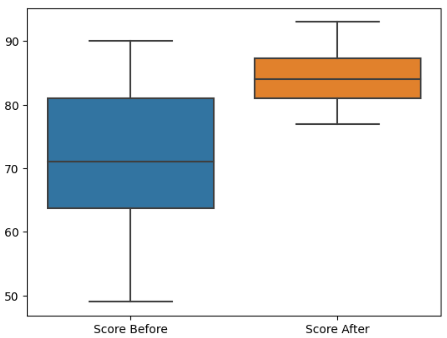


In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Computer%20Skills.csv', delimiter=';')
df.head()

,Employee,Score Before,Score After
0,1,84,84
1,2,66,85
2,3,84,87
3,4,57,84
4,5,67,88


<Axes: >

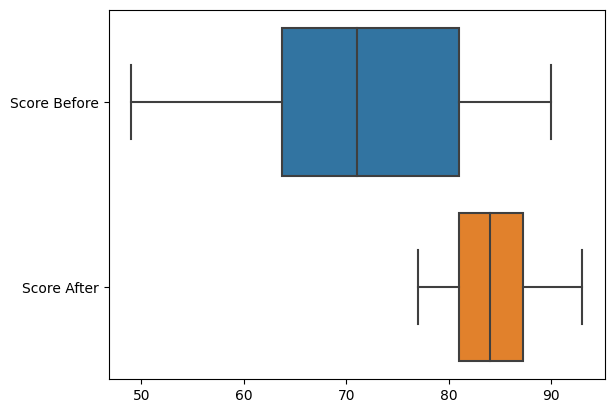

In [31]:
sns.boxplot(data=df[["Score Before","Score After"]],orient="h")

In [32]:
# Dit is een gepaarde toets
# H1: Score Before - Score After < 0 (Score after is dus beter) => Score Before < Score After
stats.ttest_rel(df["Score Before"], df["Score After"], alternative='less')
#P < 0.05, dus een significant verschil, dus nullhypothese verwerpen, Score erna is beter,
#  dus effectiviteit van training werkt

TtestResult(statistic=-7.494583135258961, pvalue=2.265324293633084e-09, df=39)

In [33]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd
cohen_d(df["Score Before"],df["Score After"])

1.61935192361693

In [40]:
def glass(a, b):
    return abs(a.mean() - b.mean()) / a.std()
glass(df["Score Before"],df["Score After"])

1.2405630189411778